<p> use the functions genarate_normal_data, genarate_lognormal_data to get the two 1-d data sets. </p>
<p> ex: <i>normaldata = genarate_normal_data()</i>, <i>logdata = genarate_lognormal_data()</i> </p>
<p>Q1.
<ol>
<li>Plot the Q-Q plot between the normaldata (N) and logdata (L)</li>
<li> Find the covariance between N and L vectors
    <ul>
    <li>try to plot datapoints (N(i),L(i)) try to get the relation</li>
    <li>use inbuilt functions to get this value</li>
    </ul>
 </li>
<li> Do 1
, 2 for Normalized vectors of N and L</li>
<li> Do 1, 2 for Standardized vectors of N and L</li>
</ol>
</p>
<p>Q2.
<li>1. Prove that the E[(X-μ)^2] = σ^2</li>
<li>2. Prove that the Expectation of a randam varaible X~N(μ,σ) is equal to μ</li>
</p>

## Plotting PDF of Normal and Log Normal Distribution

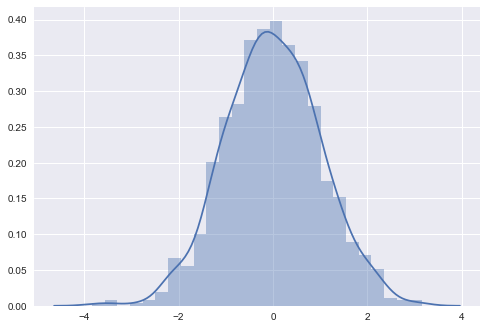

In [23]:
#Lets import numpy, seaborn, matplotlib and generate normal /
#data using random function.
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#defining a function to generate normal data.
def genarate_normal_data():
    return np.random.randn(1000)
normaldata = genarate_normal_data()

#Now we will plot the distribution.
sns.distplot(normaldata)
plt.show()

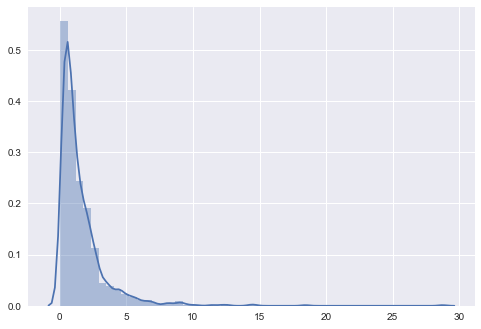

In [24]:
#defining a function to generate log normal data.
def genarate_lognormal_data():
    return np.random.lognormal(0,1,1000)
logdata = genarate_lognormal_data()

#Now we will plot the distribution.
sns.distplot(logdata)
plt.show()

## Scatter plots between Normal & Log Normal Distribution

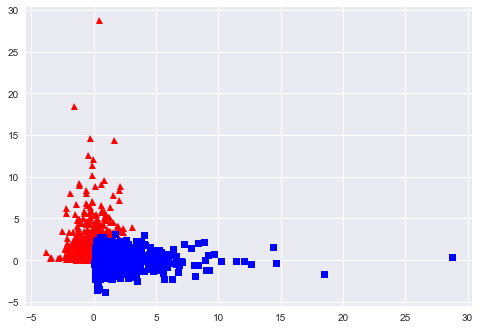

In [25]:
#plotting the scatter plot between normaldata and logdata
plt.plot(normaldata, logdata, 'r^', logdata, normaldata, 'bs')
plt.show()

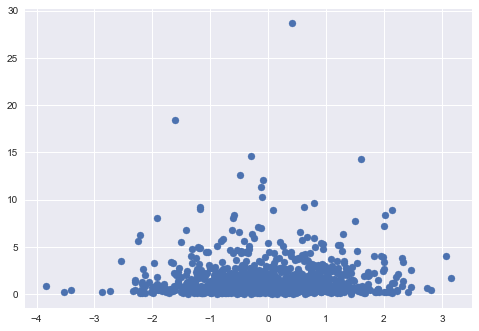

In [26]:
#Plotting the scatter plot b/w both the distribution.
plt.scatter(normaldata, logdata)
plt.show()

## Q-Q Plot of Normal and Log Normal Distribution

The purpose of the quantile-quantile (QQ) plot is to show if two data sets come from the same distribution.
Plotting the first data set’s quantiles along the x-axis and plotting the second data set’s quantiles along the
y-axis is how the plot is constructed. Below mentioned are some points that need to be remembered always:

1. Q-Q Plot between two Distribution helps us in understanding whether two random variables belong from same distribution.                         
2. If the two distributions being compared are similar, the points in the Q–Q plot will approximately lie on the line y = x.
3. If the distributions are linearly related, the points in the Q–Q plot will approximately lie on a line, but not necessarily on the line y = x.

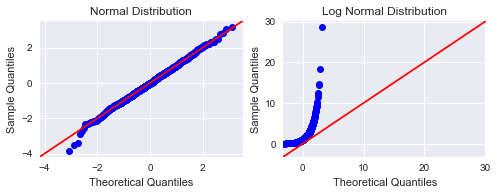

In [27]:
#Plot the Q-Q plot of normaldata and logdata.
import statsmodels.api as sm
import pylab

ax1 = plt.subplot(221)
plt.title('Normal Distribution')
sm.qqplot(normaldata, line='45', ax=ax1)

ax2 = plt.subplot(222)
plt.title('Log Normal Distribution')
sm.qqplot(logdata, line='45', ax=ax2)
plt.show()

## Q-Q Plot Between Normal and Log Normal Distribution

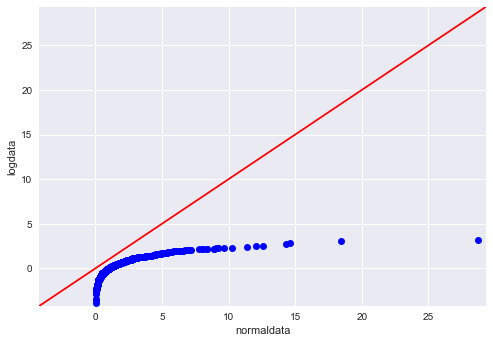

In [28]:
# Plot Q-Q Plot between normaldata & logdata
sm.qqplot_2samples(normaldata , logdata, xlabel="normaldata", ylabel="logdata", line='45')
plt.show()

## Covariance

Covariance, correlation, and regression analysis deal with the study of two or more variables and their relationships to one another. Covariance and correlation will help us determine if any relationships exist among the variables, and regression will help us identify the relationships, if they exist.

Since covariance depends upon the unit of measurement, it is not really that useful to statisticians.
The correlation coefficient was developed to provide for a measure of linear relationship that does not possess the shortcomings of covariance. 

References: <br>
http://www.visiondummy.com/2014/04/geometric-interpretation-covariance-matrix/<br>
http://faculty.frostburg.edu/math/monline/stat/41_p1.html

In [29]:
#Lets see Covariance Matrix between both distributions.
print np.cov(normaldata, logdata)[0][1]

0.0654419086333


## Normalizing & Analysing both Distributions

In [30]:
# Normalizing Normal Distribution.
ndenominator = max(normaldata) - min(normaldata)
nnormalize = []
for i in range(0,len(normaldata)):
    nnormalize.append((normaldata[i] - min(normaldata))/ndenominator)
nnormalize = np.asarray(nnormalize)

In [31]:
# Normalizing Log Normal Distribution.
ldenominator = max(logdata) - min(logdata)
lnormalize = []
for i in range(0,len(logdata)):
    lnormalize.append((logdata[i] - min(logdata))/ldenominator)
lnormalize = np.asarray(lnormalize)

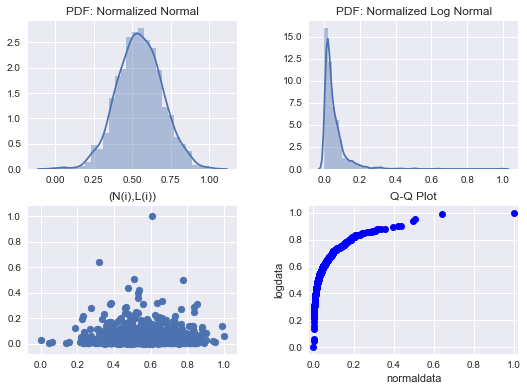

In [32]:
# Normalized Normal Distribution
plt.subplot(221)
plt.title('PDF: Normalized Normal')
sns.distplot(nnormalize)

# Normalized Log Normal Distribution
plt.subplot(222)
plt.title('PDF: Normalized Log Normal')
sns.distplot(lnormalize)

# Plotting datapoints (N(i),L(i))
plt.subplot(223)
plt.title('(N(i),L(i))')
plt.scatter(nnormalize, lnormalize)

# Q-Q Plot
ax = plt.subplot(224)
plt.title('Q-Q Plot')
sm.qqplot_2samples(nnormalize , lnormalize, xlabel="normaldata", ylabel="logdata", ax=ax)

# Adjusting the subplots.
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
plt.show()

In [33]:
#Lets see Covariance after normalizing the data
print np.cov(nnormalize, lnormalize)[0][1]

0.00032612855406


## Standardizing & Analysing both Distributions

In [34]:
# Standardizing Normal Distribution.
def variance(data):
    m = sum(data)/float(len(data))
    v=0
    for i in data:
        v+=(i - m)**2
    return v/float(len(data))

def std_dev(variance):
    return variance**0.5

m = sum(normaldata)/float(len(normaldata))
var = variance(normaldata)
sd = std_dev(var)
nstandardize = []
for i in range(0, len(normaldata)):
    nstandardize.append((normaldata[i] - m)/sd)
nstandardize = np.asarray(nstandardize)

In [35]:
# Standardizing Log Normal Distribution.
m = sum(logdata)/float(len(logdata))
var = variance(logdata)
sd = std_dev(var)
lstandardize = []
for i in range(0, len(logdata)):
    lstandardize.append((logdata[i] - m)/sd)
lstandardize = np.asarray(lstandardize)

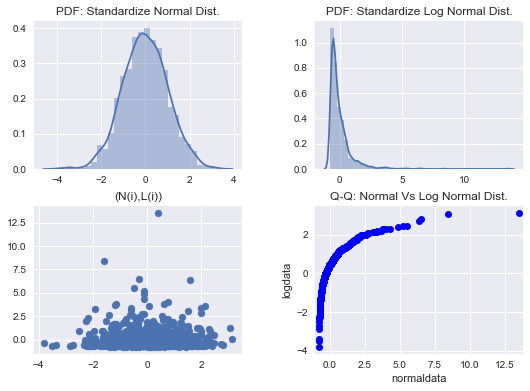

In [36]:
# Standardize Normal Distribution
plt.subplot(221)
plt.title('PDF: Standardize Normal Dist.')
sns.distplot(nstandardize)

# Standardize Log Normal Distribution
plt.subplot(222)
plt.title('PDF: Standardize Log Normal Dist.')
sns.distplot(lstandardize)

# Plotting datapoints (N(i),L(i))
plt.subplot(223)
plt.title('(N(i),L(i))')
plt.scatter(nstandardize, lstandardize)

# Q-Q Plot
ax = plt.subplot(224)
plt.title('Q-Q: Normal Vs Log Normal Dist.')
sm.qqplot_2samples(nstandardize , lstandardize, xlabel="normaldata", ylabel="logdata", ax=ax)

# Adjusting the subplots.
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
plt.show()

In [37]:
#Lets see Covariance Matrix after standardizing the data
print np.cov(nstandardize, lstandardize)[0][1]

0.0325124905903


## Covariation & Correlation

The problem with covariances is that they are hard to compare: when you calculate the covariance of a set of heights and weights, as expressed in (respectively) meters and kilograms, you will get a different covariance from when you do it in other units (which already gives a problem for people doing the same thing with or without the metric system!), but also, it will be hard to tell if (e.g.) height and weight 'covariate better' than, e.g. the length of your toes and fingers, simply because the 'scale' you calculate the covariance on is different.

The solution to this is to 'normalize' the covariance: you divide the covariance by something that represents the diversity and scale in both the covariates, and end up with a value that is assured to be between -1 and 1: the correlation. Whatever unit your original variables were in, you will always get the same result, and this will also ensure that you can, to a certain degree, compare whether two variables 'correlate' more than two others, simply by comparing their correlation.

# Conclusion

After watching all the covariance's, we can easily conclude that the normaldata and lognormaldata are not at all correlated.